# A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.auto import tqdm
from astroML import stats as astroMLstats

I define a first function which takes the number of random sample (N) and a (random) sigma and return the integral, the knownresult and the relative error between them. The integral is computed using th definition of Montecarlo Inegration Method.

Note: $$p(x) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)$$

which correctly gives $\int_0^\infty p(x) =1$. My integral then becomes

$$I = \sigma\sqrt\frac{\pi}{2} \int_0^\infty x^3 p(x) dx $$

In [4]:
def integral(N,sigma):
    global I,knownresult, abs_err
    '''x=np.random.normal(0,sigma,N)
    x_grid=np.linspace(np.min(x)-2,np.max(x)+2,N)
    
    plt.figure(figsize=[8,8])
    plt.hist(x, bins=50, fill=False, density=True)
    plt.plot(x_grid, norm(loc=0,scale=sigma).pdf(x_grid), color='red', label='gaussian') # PDF=prob density function
    plt.legend(loc='best')
    
    plt.figure(figsize=[8,8])
    plt.hist(np.abs(x), bins=50, fill=False, density=True)
    plt.plot(np.abs(x_grid), np.abs(2*norm(loc=0,scale=sigma).pdf(x_grid)), color='red', label='half gaussian') # it requires the 2 in order to satisfy the double counting
    '''
    samples = np.abs(norm(loc=0,scale=sigma).rvs(N)) #RVS=randomvariates
    I = sigma*(np.pi/2)**0.5 * np.mean(samples**3) # montecarlo application
    knownresult= 2*sigma**4 
    abs_err=np.abs(I-knownresult)/knownresult
    
    #print(r'Montecarlo result = %1.3f vs known result $2\sigma^{4}$ = %1.3f ' % (I,knownresult), 'absolute error= ', abs_err)
    return (I, knownresult, abs_err  )

In [5]:
sigma=int(np.random.random_integers(0,10,1)) 
N=np.arange(1e3,1e6,3e4) #[1e3,2e3,3e3,5e3,7e3,1e4, 3e4, 5e4,8e4,1e5, 5e5, 9e5,1e6,1e7,1e8]

<ipython-input-5-13c804d96893>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  sigma=int(np.random.random_integers(0,10,1))


I call the previus function passing different values for N and sigma

In [6]:
def distribution(N,sigma):
    global rsult
    
    result=[]
    knownres=[]
    error=[]
       
    for temp in range(len(N)):
        integral(int(N[temp]),sigma)
        result.append(I)
        knownres.append(knownresult)
        error.append(abs_err)
    
    
    '''plt.figure(figsize=[8,8])
    plt.xscale('log')
    plt.scatter(N,result, color='black')
    plt.plot(N,result, color='black', linestyle='--')
    plt.hlines(knownres,np.min(N),np.max(N), color='red', label=r'$2\sigma^{4}$')
    plt.legend(loc='best')  
    plt.title('result of the integral with MC method')  
    
    x_grid=np.linspace(990,1e8,100000)
    plt.figure(figsize=[8,8])
    plt.xscale('log')
    plt.scatter(N,error, color='black')
    plt.plot(N,error, color='black', linestyle='--')
    plt.plot(x_grid,1/np.sqrt(x_grid),color='red', label=r'$frac{1}{\sqrt{N}}$')
    plt.title('integral absolute error')
    plt.legend(loc='best')'''
        
    

    return (result)


In cocnlusion I call 1000 times the last function and plot the results

In [13]:
realization=1000
R=[]

for temp in tqdm(range(realization)):
    R.append(distribution(N,sigma))


  

  0%|          | 0/1000 [00:00<?, ?it/s]

IndexError: index 999 is out of bounds for axis 0 with size 34

Plot the results

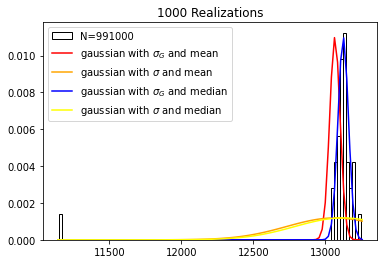

In [24]:
index_N=33 # Choose which combination of sigma and N is better to visualize th result

plt.hist(R[:][index_N], density=True, fill=False, bins=100, label='N=%1.0f' % (N[index_N])) #for a fixed N (the 5th N in th N-array)
x_grid=np.linspace(np.min(R[:][index_N])-10, np.max(R[:][index_N])+10,100)
plt.plot(x_grid, norm(loc=np.mean(R[:][index_N]), scale=astroMLstats.sigmaG(R[:][index_N])).pdf(x_grid), label=r'gaussian with $\sigma_G$ and mean', color='red') # sigma_G helps to avoids the histogram's outliyers 
plt.plot(x_grid, norm(loc=np.mean(R[:][index_N]), scale=np.std(R[:][index_N])).pdf(x_grid), label='gaussian with $\sigma$ and mean', color='orange')

#median is a best estimateor since the presence of outlyers
plt.plot(x_grid, norm(loc=np.median(R[:][index_N]), scale=astroMLstats.sigmaG(R[:][index_N])).pdf(x_grid), label=r'gaussian with $\sigma_G$ and median', color='blue') # sigma_G helps to avoids the histogram's outliyers 
plt.plot(x_grid, norm(loc=np.median(R[:][index_N]), scale=np.std(R[:][index_N])).pdf(x_grid), label='gaussian with $\sigma$ and median', color='yellow')

plt.title('%1.0f Realizations' % (realization))
plt.legend(loc='best')

Note: Any function contain a commented plot that I use to check if the function works right. For computational reason I comments it.